### Importing the Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob

from keras.models import load_model

### Loading the Model

In [2]:
model = load_model('model.h5')

c:\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\python\Lib\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Creating a dictionary of letters with Index

In [3]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

Reading the images from the Specified Path

In [4]:
images = [cv.imread(file) for file in glob.glob('C:\\Users\\LENOVO\\Music\\dataupload\\Handwritten-Character-Recognition-main\\(A-Z) Images\\*.jpg')]

Plotting the Images read from the file

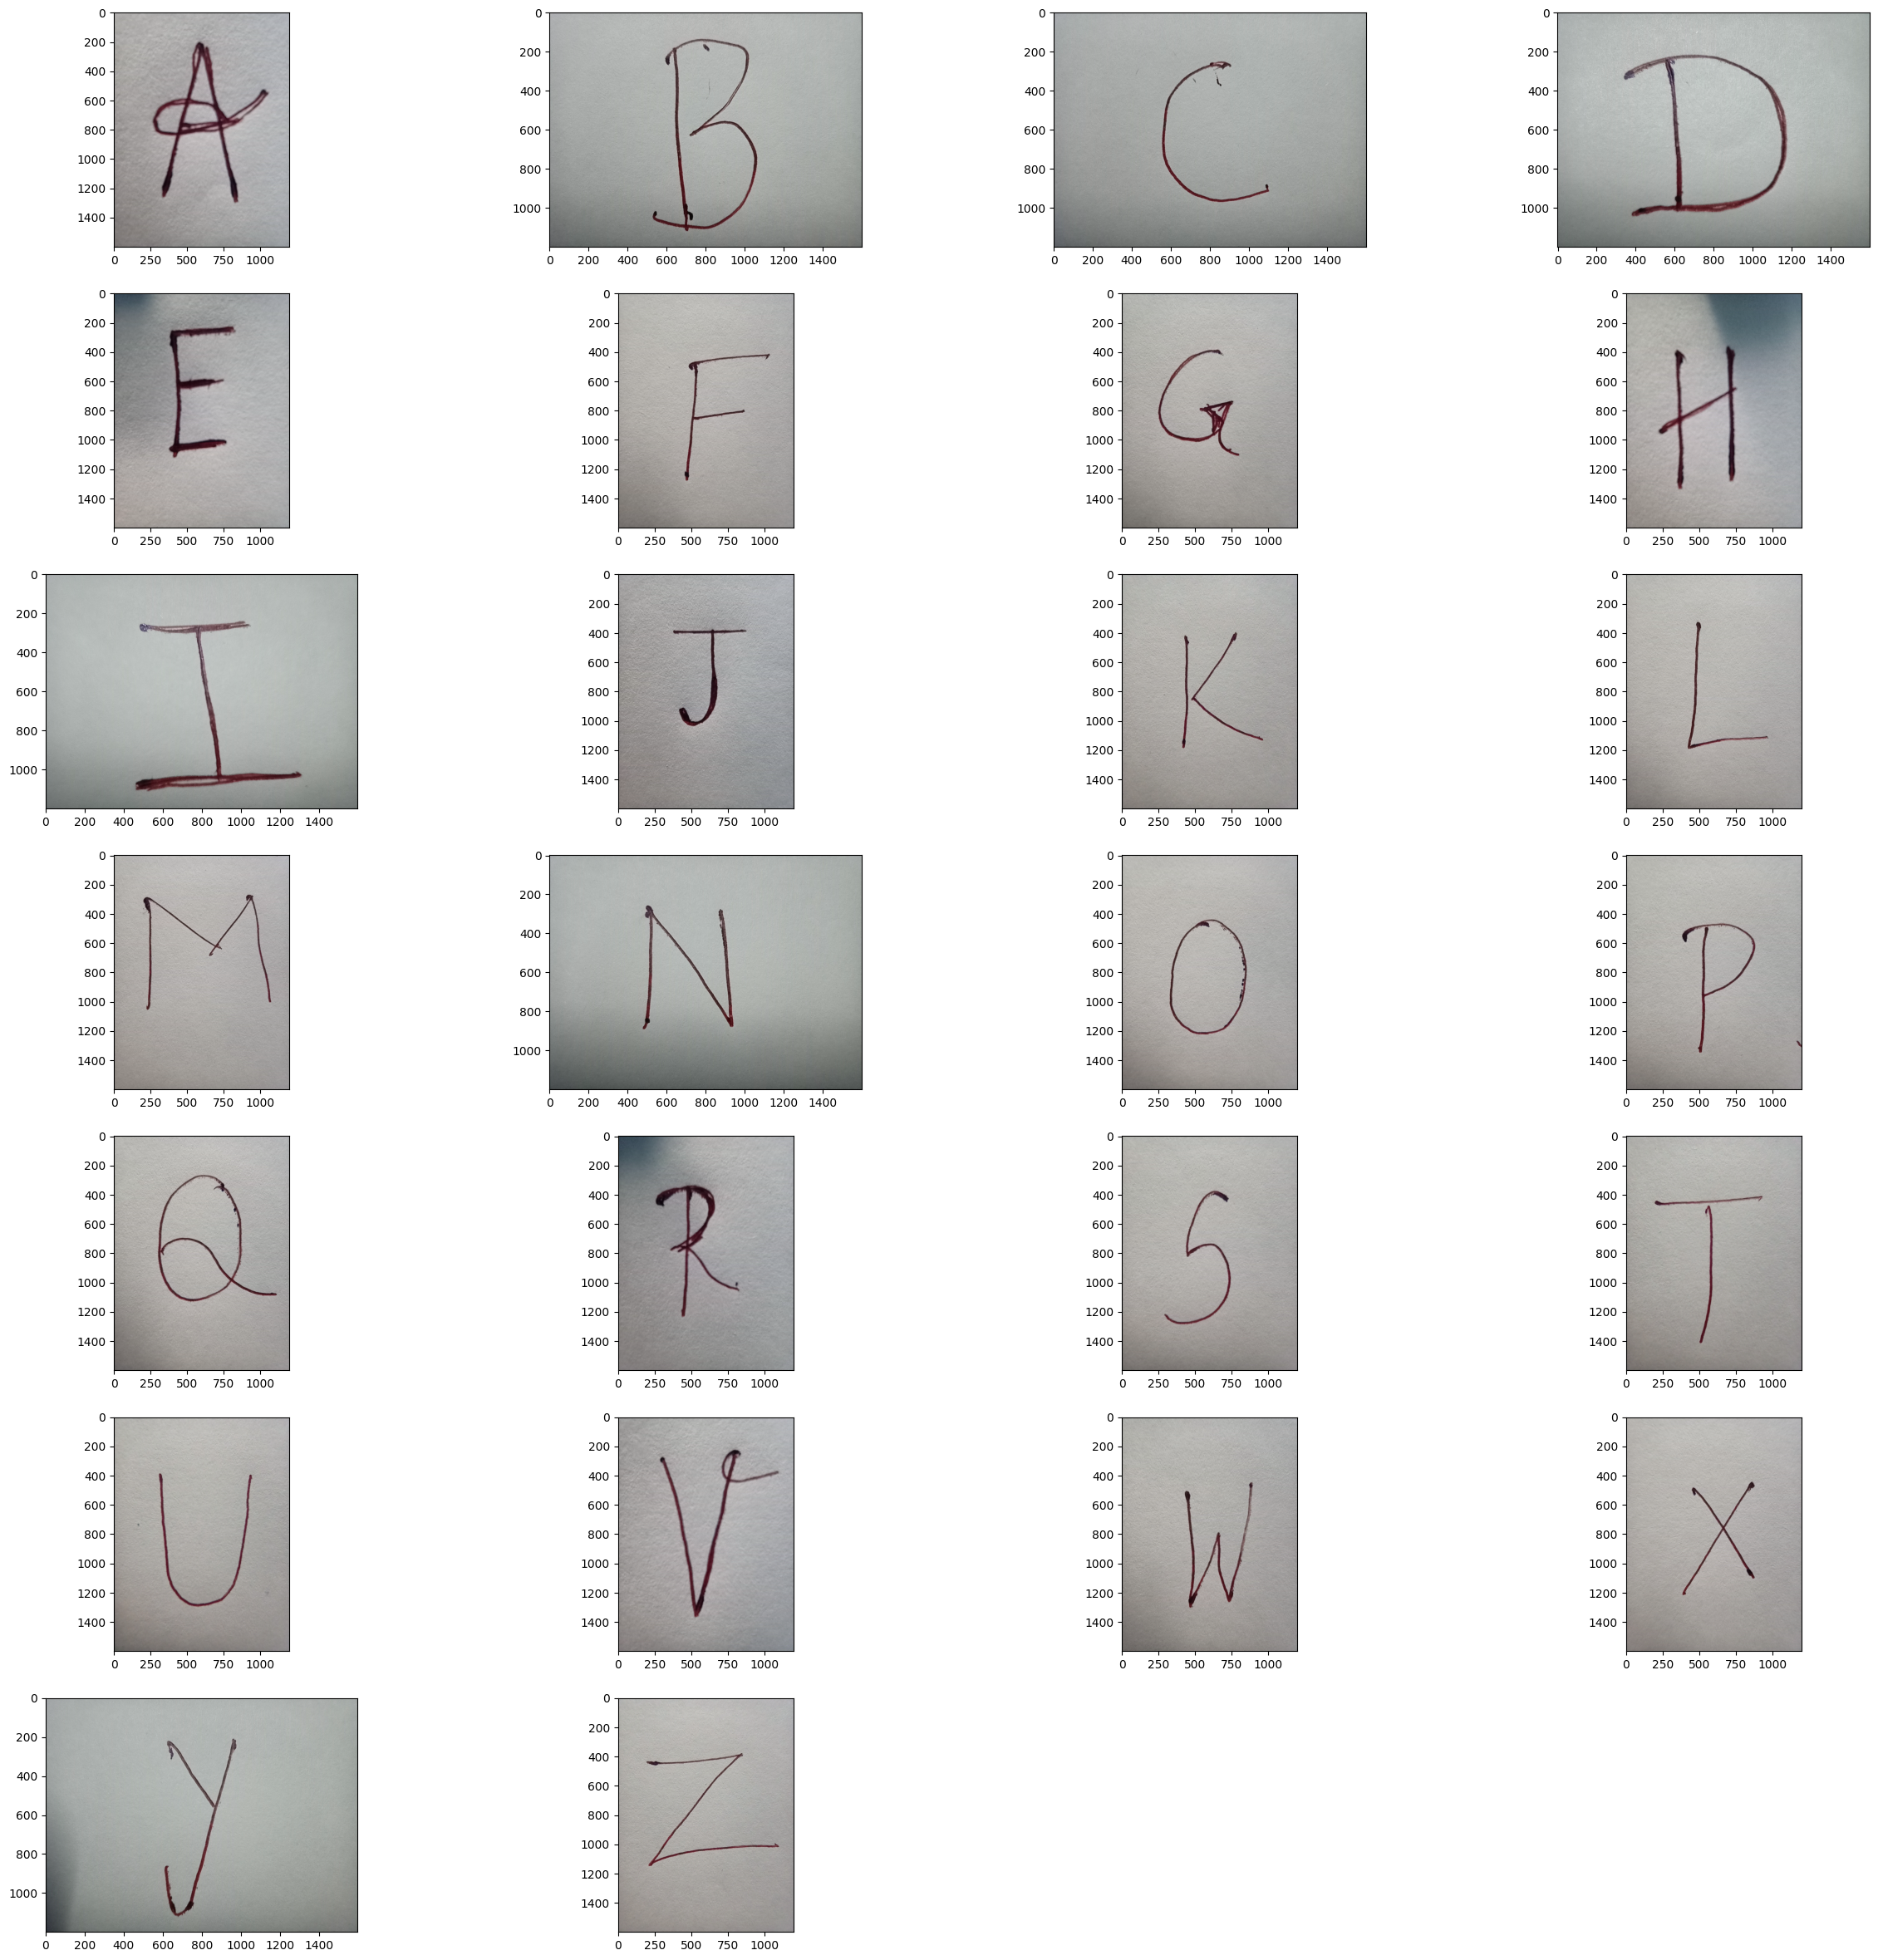

In [5]:
fig, axes = plt.subplots(7, 4, figsize = (30,30))
axes = axes.flatten()
for i in range(len(images)):
    axes[i].imshow(images[i])
plt.delaxes(ax = axes[26])
plt.delaxes(ax = axes[27])

### Image Processing, Plotting and Predicting the images 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


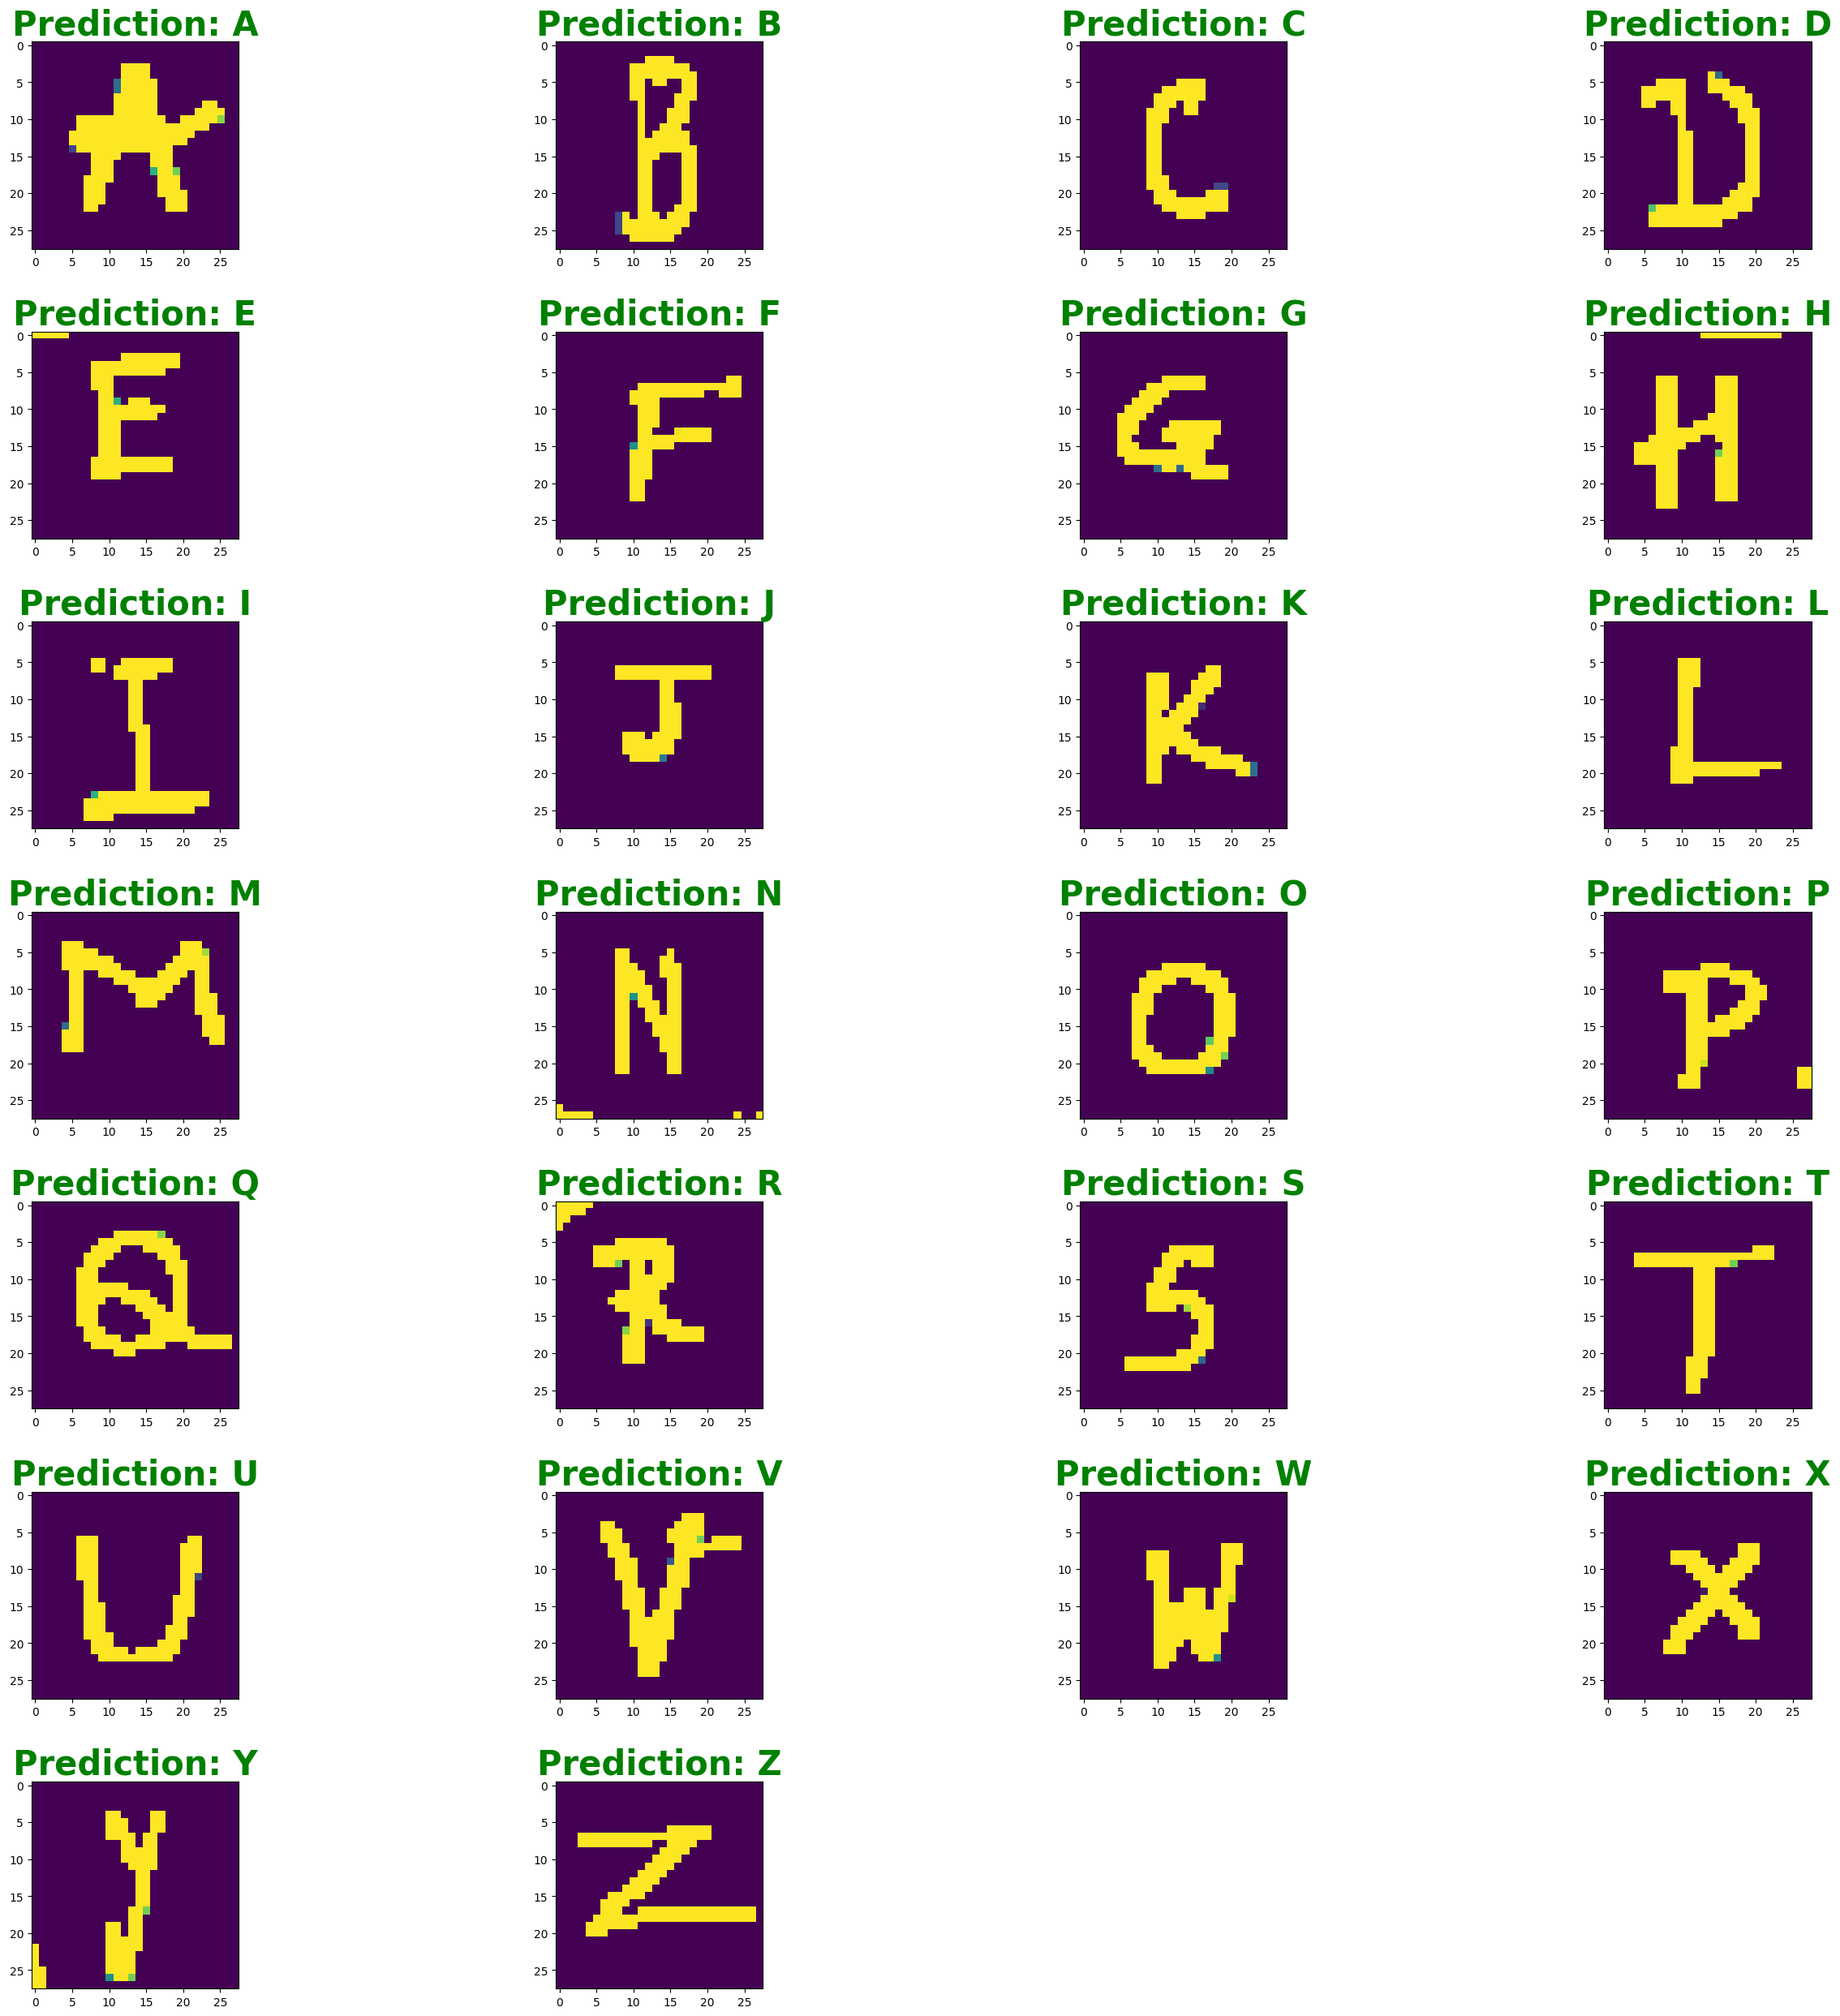

In [6]:
fig, axes = plt.subplots(7, 4, figsize = (30, 30))
axes = axes.flatten()

for i in range(len(images)):
    gray = cv.cvtColor(images[i], cv.COLOR_BGR2GRAY)
    gray = cv.medianBlur(gray,5)
    ret,gray = cv.threshold(gray,75,180,cv.THRESH_BINARY)

    element = cv.getStructuringElement(cv.MORPH_RECT,(90,90))
    gray = cv.morphologyEx(gray,cv.MORPH_GRADIENT,element)

    gray = gray/255. #downsampling
    #gray = 1 - gray
    gray = cv.resize(gray, (28,28)) #resizing

    #reshaping the image
    gray = np.reshape(gray, (28, 28))

    axes[i].imshow(gray)
    
    pred = dict_word[np.argmax(model.predict(np.reshape(gray,(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 30, fontweight = 'bold', color = 'green')
    plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#removing the unnecessary subplots
plt.delaxes(ax = axes[26])
plt.delaxes(ax = axes[27])

In [7]:
import cv2 as cv

img = cv.imread('C:\\Users\\LENOVO\\Music\\dataupload\\Handwritten-Character-Recognition-main\\testt.png') 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
ret,gray = cv.threshold(gray,75,180,cv.THRESH_BINARY)

element = cv.getStructuringElement(cv.MORPH_RECT,(90,90))
gray = cv.morphologyEx(gray,cv.MORPH_GRADIENT,element)
gray = gray/255. #downsampling
    #gray = 1 - gray
gray = cv.resize(gray, (28,28)) #resizing

    #reshaping the image
gray = np.reshape(gray, (28, 28))

pred = dict_word[np.argmax(model.predict(np.reshape(gray,(1,28,28,1))))]
print("Prediction: " + pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction: A


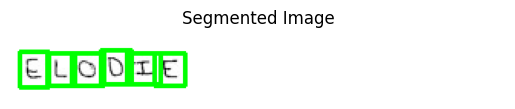

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Recognized Text: ELODIE


In [16]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


def recognize_character(character_image):
    """
    Recognizes a character in an image.

    Args:
        character_image: A grayscale image of a character.

    Returns:
        The predicted character.
    """
    # Resize the image to a standard size.
    character_image = cv2.resize(character_image, (28, 28))

    # Normalize the pixel values.
    character_image = character_image.astype('float32') / 255.0

    # Reshape the image to the model input format.
    character_image = np.expand_dims(character_image, axis=0)
    character_image = np.expand_dims(character_image, axis=-1)

    # Predict the character using the model.
    prediction = model.predict(character_image)

    # Get the predicted character.
    predicted_character = dict_word[np.argmax(prediction)]

    return predicted_character

def segment_characters(image_path, margin=5):
    # Load image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Use morphology to enhance characters
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours
    cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

    # Sort contours from left to right
    cntrs = sorted(cntrs, key=lambda c: cv2.boundingRect(c)[0])

    # Extract individual characters and draw bounding boxes
    character_images = []
    for c in cntrs:
        x, y, w, h = cv2.boundingRect(c)
        x -= margin  # add or subtract margin to make the bounding box larger or smaller
        y -= margin
        w += 2 * margin
        h += 2 * margin
        character_images.append(thresh[max(0, y):min(y+h, thresh.shape[0]), max(0, x):min(x+w, thresh.shape[1])])
        # Draw bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the segmented image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Image")
    plt.axis('off')
    plt.show()

    return character_images

# Example usage:
image_path = "C:/Users/LENOVO/Music/dataupload/Handwritten-Character-Recognition-main/Images de Teste/img1.jpg"
character_images = segment_characters(image_path)
recognized_text = ""
for char_img in character_images:
    recognized_char = recognize_character(char_img)
    recognized_text += recognized_char

# Print or use recognized_text as needed
print("Recognized Text:", recognized_text)
